In [1]:
!rm -rf antihydrogen_test.csv.gz
!rm -rf antihydrogen_test.csv
!rm -rf antihydrogen_train.csv.gz
!rm -rf antihydrogen_train.csv
!rm -rf antihydrogen_valid.csv.gz
!rm -rf antihydrogen_valid.csv

!wget http://mlphysics.ics.uci.edu/data/antihydrogen/antihydrogen_test.csv.gz
!wget http://mlphysics.ics.uci.edu/data/antihydrogen/antihydrogen_train.csv.gz
!wget http://mlphysics.ics.uci.edu/data/antihydrogen/antihydrogen_valid.csv.gz

!gunzip antihydrogen_test.csv.gz
!gunzip antihydrogen_train.csv.gz
!gunzip antihydrogen_valid.csv.gz

--2025-01-08 12:07:40--  http://mlphysics.ics.uci.edu/data/antihydrogen/antihydrogen_test.csv.gz
Resolving mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)... 128.195.1.86
Connecting to mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6608724 (6.3M) [application/x-gzip]
Saving to: ‘antihydrogen_test.csv.gz’

antihydrogen_test.c 100%[===================>]   6.30M  7.73MB/s    in 0.8s    

2025-01-08 12:07:41 (7.73 MB/s) - ‘antihydrogen_test.csv.gz’ saved [6608724/6608724]

--2025-01-08 12:07:41--  http://mlphysics.ics.uci.edu/data/antihydrogen/antihydrogen_train.csv.gz
Resolving mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)... 128.195.1.86
Connecting to mlphysics.ics.uci.edu (mlphysics.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19840043 (19M) [application/x-gzip]
Saving to: ‘antihydrogen_train.csv.gz’

antihydrogen_train. 100%[===================>]  18.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


train = pd.read_csv('antihydrogen_train.csv',sep=' ',dtype='int8')
test = pd.read_csv('antihydrogen_test.csv',sep=' ',dtype='int8')
valid = pd.read_csv('antihydrogen_valid.csv',sep=' ',dtype='int8')

In [3]:
print('Shape del train',train.shape)
print('Shape del test',test.shape)
print('Shape del valid',valid.shape)

Shape del train (957400, 1431)
Shape del test (319131, 1431)
Shape del valid (319363, 1431)


In [4]:
#Divisione del database di train nelle 4 componenti dei rivelatori
Y_train = train['0']
Y_valid = valid['0']
Y_test  = test['0']
#Canale 1 (interno)
inner_Z_train = train[train.columns[1:447]]
outer_Z_train = train[train.columns[694:1140]]
inner_Z_valid = valid[valid.columns[1:447]]
outer_Z_valid = valid[valid.columns[694:1140]]
inner_Z_test = test[test.columns[1:447]]
outer_Z_test = test[test.columns[694:1140]]
#Canale 2 (esterno)
inner_phi_train = train[train.columns[448:693]]
outer_phi_train = train[train.columns[1141:1430]]
inner_phi_valid = valid[valid.columns[448:693]]
outer_phi_valid = valid[valid.columns[1141:1430]]
inner_phi_test = test[test.columns[448:693]]
outer_phi_test = test[test.columns[1141:1430]]



print(outer_Z_train.shape)
print(inner_Z_train.shape)
print(inner_Z_valid.shape)
print(outer_Z_valid.shape)
print(inner_Z_test.shape)
print(outer_Z_test.shape)
print(outer_phi_train.shape)
print(inner_phi_train.shape)
print(outer_phi_valid.shape)
print(inner_phi_valid.shape)
print(outer_phi_test.shape)
print(inner_phi_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(957400, 446)
(957400, 446)
(319363, 446)
(319363, 446)
(319131, 446)
(319131, 446)
(957400, 289)
(957400, 245)
(319363, 289)
(319363, 245)
(319131, 289)
(319131, 245)
(957400,)
(319363,)


In [5]:
inputA = keras.Input(shape=(446,1))
inputB = keras.Input(shape=(446,1))
inputC = keras.Input(shape=(289,1))
inputD = keras.Input(shape=(245,1))

x = keras.layers.Conv1D(8, kernel_size=(7))(inputA)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool1D((2))(x)

y = keras.layers.Conv1D(8, kernel_size=(7))(inputB)
y = keras.layers.BatchNormalization()(y)
y = keras.layers.ReLU()(y)
y = keras.layers.MaxPool1D((2))(y)



x = keras.layers.Conv1D(16, kernel_size=(3))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool1D((2))(x)

y = keras.layers.Conv1D(16, kernel_size=(3))(y)
y = keras.layers.BatchNormalization()(y)
y = keras.layers.ReLU()(y)
y = keras.layers.MaxPool1D((2))(y)



x = keras.layers.Conv1D(32, kernel_size=(3))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool1D((2))(x)

y=  keras.layers.Conv1D(32, kernel_size=(3))(y)
y = keras.layers.BatchNormalization()(y)
y = keras.layers.ReLU()(y)
y = keras.layers.MaxPool1D((2))(y)



x = keras.layers.Conv1D(64, kernel_size=(2))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool1D((2))(x)

y = keras.layers.Conv1D(64, kernel_size=(2))(y)
y = keras.layers.BatchNormalization()(y)
y = keras.layers.ReLU()(y)
y = keras.layers.MaxPool1D((2))(y)



x = keras.layers.Conv1D(128, kernel_size=(3))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)

y = keras.layers.Conv1D(128, kernel_size=(3))(y)
y = keras.layers.BatchNormalization()(y)
y = keras.layers.ReLU()(y)


x = keras.layers.Flatten()(x)
y = keras.layers.Flatten()(y)


z = keras.layers.Conv1D(8, kernel_size=(7))(inputC)
z = keras.layers.BatchNormalization()(z)
z = keras.layers.ReLU()(z)
z = keras.layers.MaxPool1D((2))(z)

t = keras.layers.Conv1D(8, kernel_size=(7))(inputD)
t = keras.layers.BatchNormalization()(t)
t = keras.layers.ReLU()(t)
t = keras.layers.MaxPool1D((2))(t)
z = keras.layers.Conv1D(16, kernel_size=(3))(z)
z = keras.layers.BatchNormalization()(z)
z = keras.layers.ReLU()(z)
z = keras.layers.MaxPool1D((2))(z)

t = keras.layers.Conv1D(16, kernel_size=(3))(t)
t = keras.layers.BatchNormalization()(t)
t = keras.layers.ReLU()(t)
t = keras.layers.MaxPool1D((2))(t)

z= keras.layers.Conv1D(32, kernel_size=(3))(z)
z = keras.layers.BatchNormalization()(z)
z = keras.layers.ReLU()(z)
z = keras.layers.MaxPool1D((2))(z)

t= keras.layers.Conv1D(32, kernel_size=(3))(t)
t = keras.layers.BatchNormalization()(t)
t = keras.layers.ReLU()(t)
t = keras.layers.MaxPool1D((2))(t)

z = keras.layers.Conv1D(64, kernel_size=(2))(z)
z = keras.layers.BatchNormalization()(z)
z = keras.layers.ReLU()(z)
z = keras.layers.MaxPool1D((2))(z)

t = keras.layers.Conv1D(64, kernel_size=(2))(t)
t = keras.layers.BatchNormalization()(t)
t = keras.layers.ReLU()(t)
t = keras.layers.MaxPool1D((2))(t)

z = keras.layers.Conv1D(128, kernel_size=(3))(z)
z = keras.layers.BatchNormalization()(z)
z = keras.layers.ReLU()(z)

t = keras.layers.Conv1D(128, kernel_size=(3))(t)
t = keras.layers.BatchNormalization()(t)
t = keras.layers.ReLU()(t)


t = keras.layers.Flatten()(t)
z = keras.layers.Flatten()(z)





x = keras.Model(inputs=inputA, outputs=x)
y = keras.Model(inputs=inputB, outputs=y)
z = keras.Model(inputs=inputC, outputs=z)
t = keras.Model(inputs=inputD, outputs=t)
# combine the output of the two branches
combined = keras.layers.concatenate([x.output, y.output,z.output,t.output])
# apply a FC layer and then a regression prediction on the
# combined outputs
g = keras.layers.Dense(4, activation="relu")(combined)
g = keras.layers.Dense(1, activation="linear")(g)
# our model will accept the inputs of the two branches and
# then output a single value
model = keras.Model(inputs=[x.input, y.input,z.input,t.input], outputs=g)

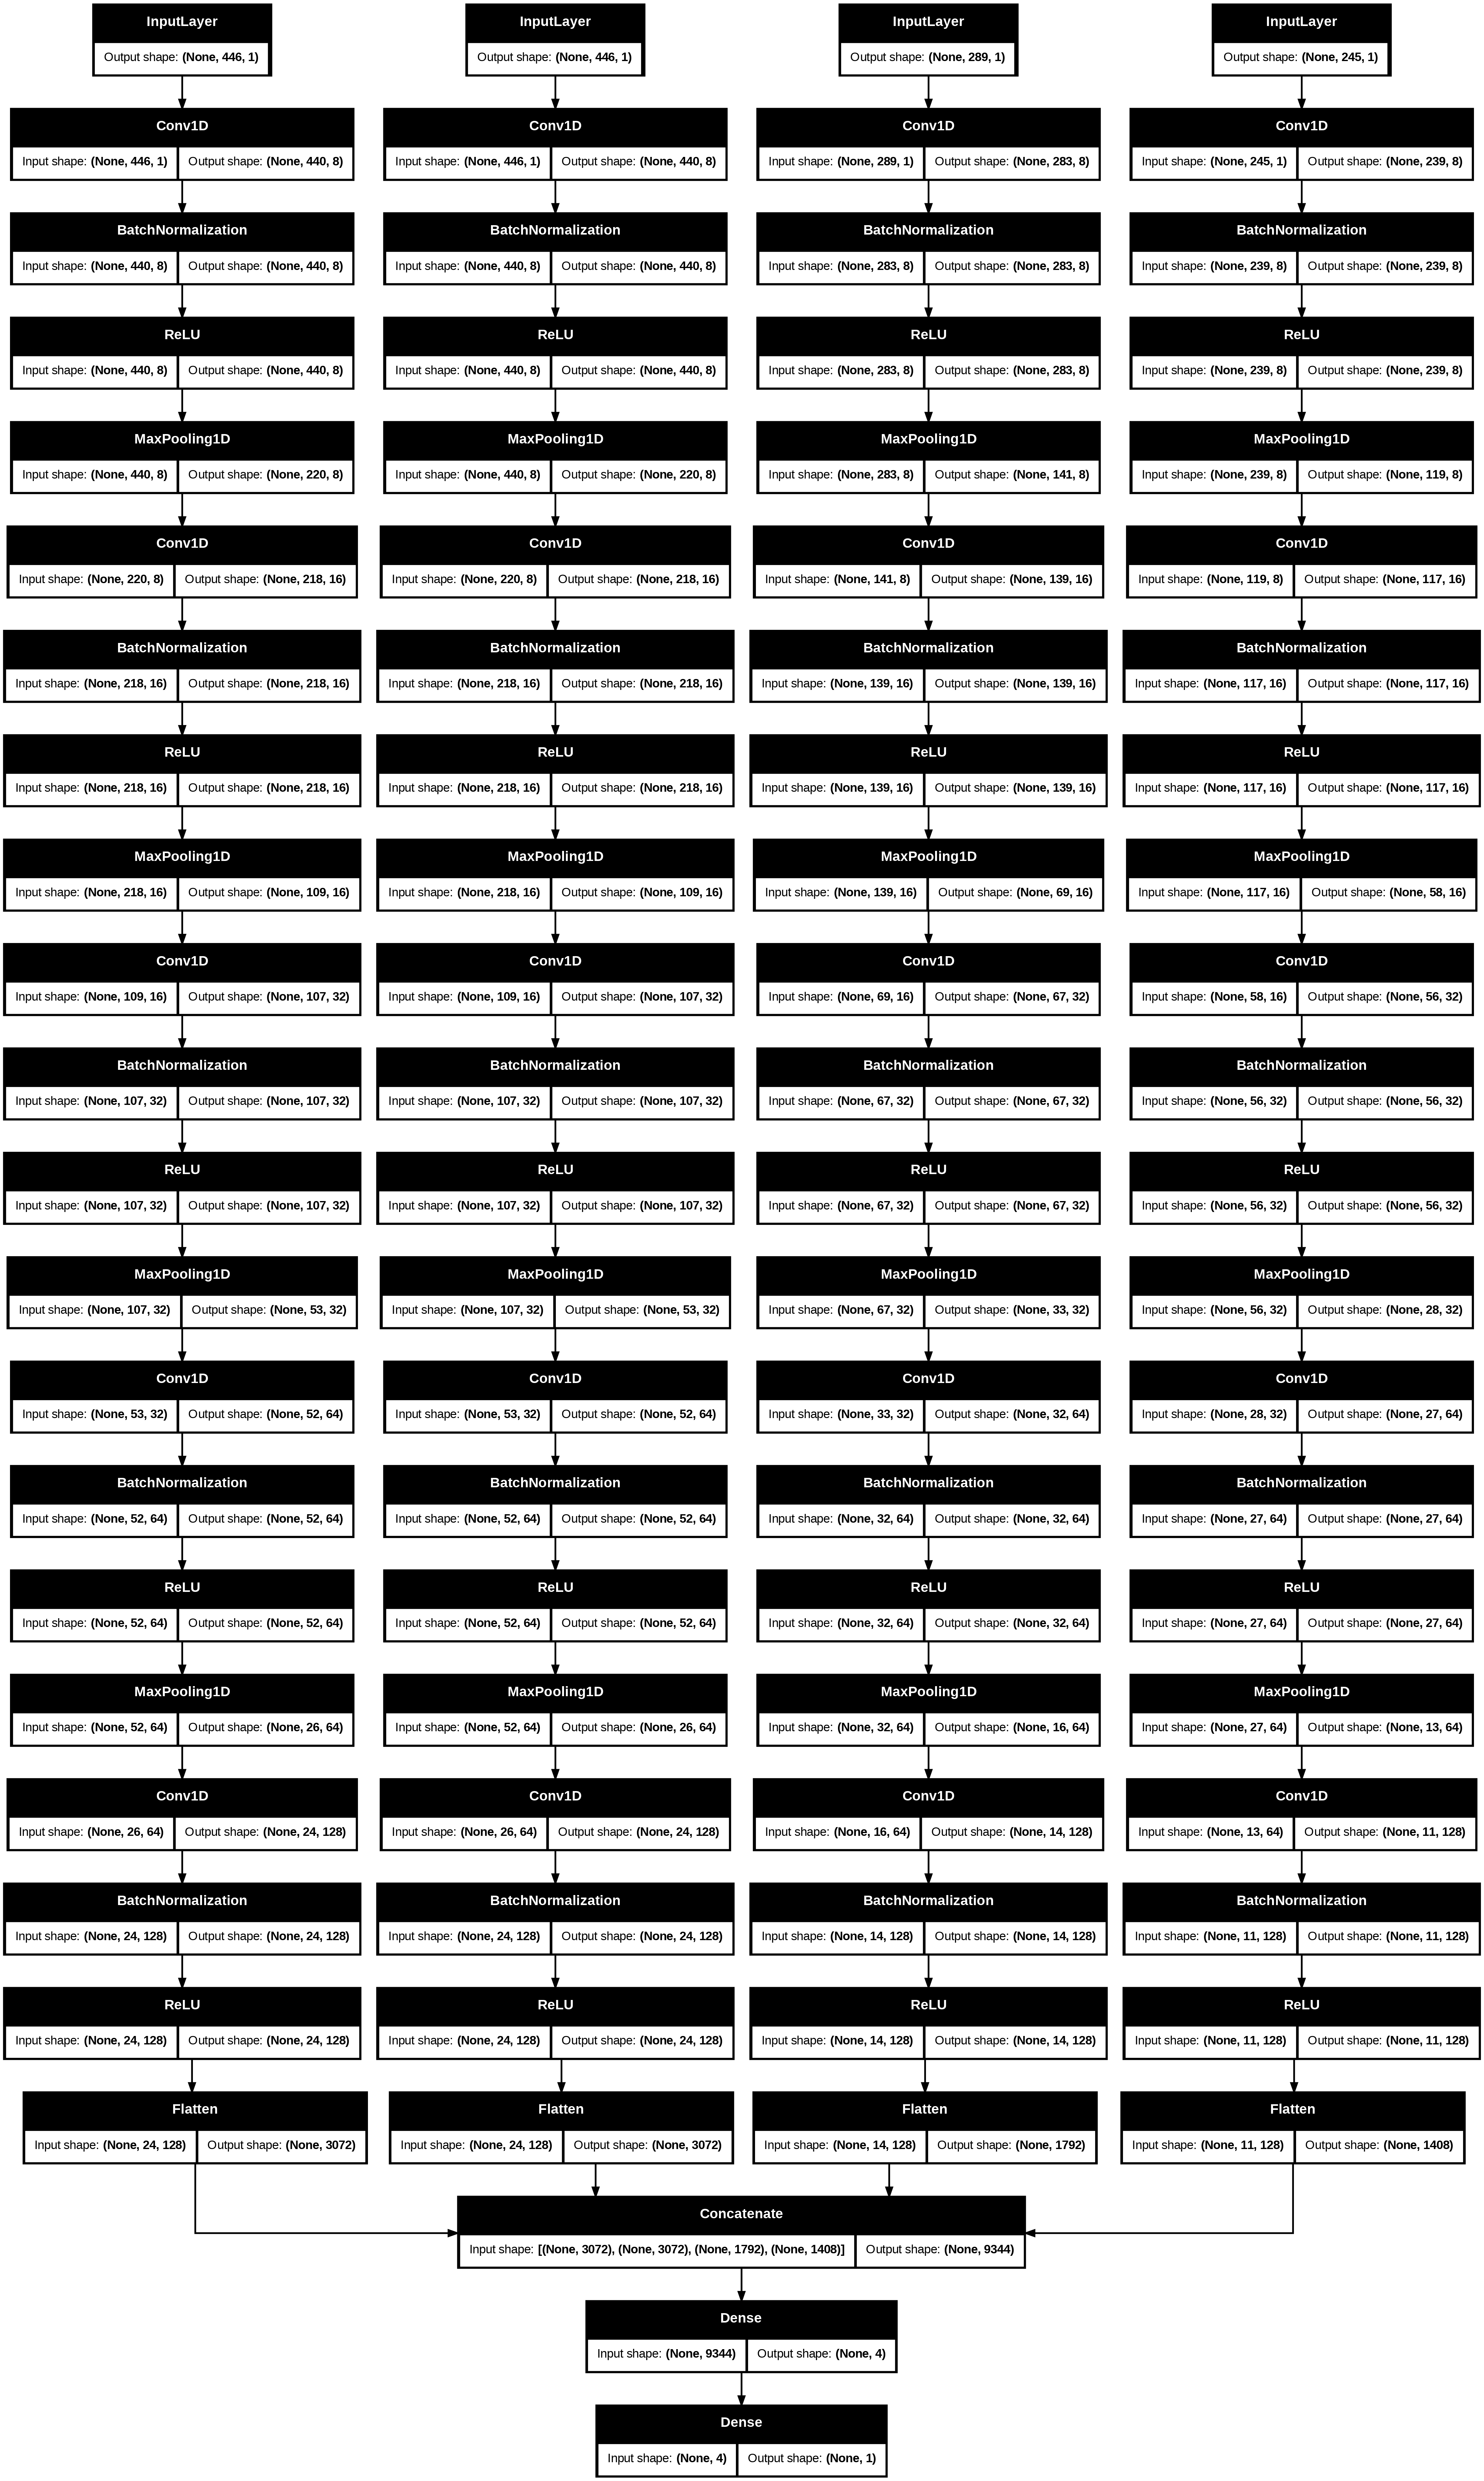

In [6]:
keras.utils.plot_model(model, "multi_input_model.png", show_shapes=True)

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [8]:
history=model.fit([outer_Z_train,inner_Z_train,outer_phi_train,inner_phi_train], Y_train,epochs=7,batch_size=32, validation_data=([outer_Z_valid,inner_Z_valid,outer_phi_valid,inner_phi_valid],Y_valid), shuffle=True, verbose=1)

Epoch 1/7
 2217/29919 ━━━━━━━━━━━━━━━━━━━━ 56:19 122ms/step - accuracy: 0.5109 - loss: 0.6942

KeyboardInterrupt: 

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate([outer_Z_test,inner_Z_test,outer_phi_test,inner_phi_test],  Y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

In [ ]:
predictions = model.predict([outer_Z_test,inner_Z_test,outer_phi_test,inner_phi_test])
predictions = predictions.reshape((predictions.shape[0]))

average_abs_diff = 0.0
for i in range(predictions.shape[0]):
  print('Predicted vs True : %f VS %f Diff= %f' % (predictions[i],Y_valid[i],predictions[i]-Y_valid[i] ))
  average_abs_diff = average_abs_diff + abs(predictions[i]-Y_valid[i])

print('Sample MAE: ', average_abs_diff/predictions.shape[0])

In [ ]:
pred = model.predict([outer_Z_test,inner_Z_test,outer_phi_test,inner_phi_test])
target_test = test['1']
for i in range(0,len(pred)):
  if pred[i] <= 0.5:
    pred[i]=0
  if pred[i] > 0.5:
    pred[i]=1

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.hist(target_test)
plt.title('Istogramma del target del test')

plt.subplot(1, 3, 2)
plt.hist(pred)
plt.title('Istogramma dei valori predetti dal modello')

plt.subplot(1, 3, 3)
plt.hist(target_test,label='valori veri')
plt.hist(pred,label='valori predetti')
plt.legend(loc='lower right')
plt.title('Istogrammi dei valori predetti vs valori veri')